# Project: Iris Flower classification

Classify Iris flowers (*Setosa*, *Versicolor*, *Virginica*) using sepal and petal measurements with a machine learning model built in Scikit-learn.


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [10]:
# Load iris data
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [12]:
# create A dataFrame from this data
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['species'] = iris.target # Add the species column (target)

In [14]:
# Display the first few rows of the dataset
print("Iris dataset: ")
print(df.head())

Iris dataset: 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [15]:
# Slipt the dataset features into X and target (Y)
x = df.drop('species', axis = 1) # Features (sepal_length,sepal_width,prtal_length,petal_width)
y = df['species'] # Target (species: 0 = Setosa, 1 = versicolor, 2 = Virginica)

In [16]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [18]:
# Split the data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [20]:
# Train a DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
# Make predicitons on the test set
y_pred = classifier.predict(x_test)

In [25]:
# Evaluate the model using accuracy, confusion matrix, and classification report
accuracy = metrics.accuracy_score(y_test, y_pred)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred) 

In [27]:
print(f'\nAccuracy: {accuracy * 100:.2f}%')
print('\nConfusion matrix: ')
print(conf_matrix)
print('\nClassification report: ')
print(class_report)


Accuracy: 100.00%

Confusion matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



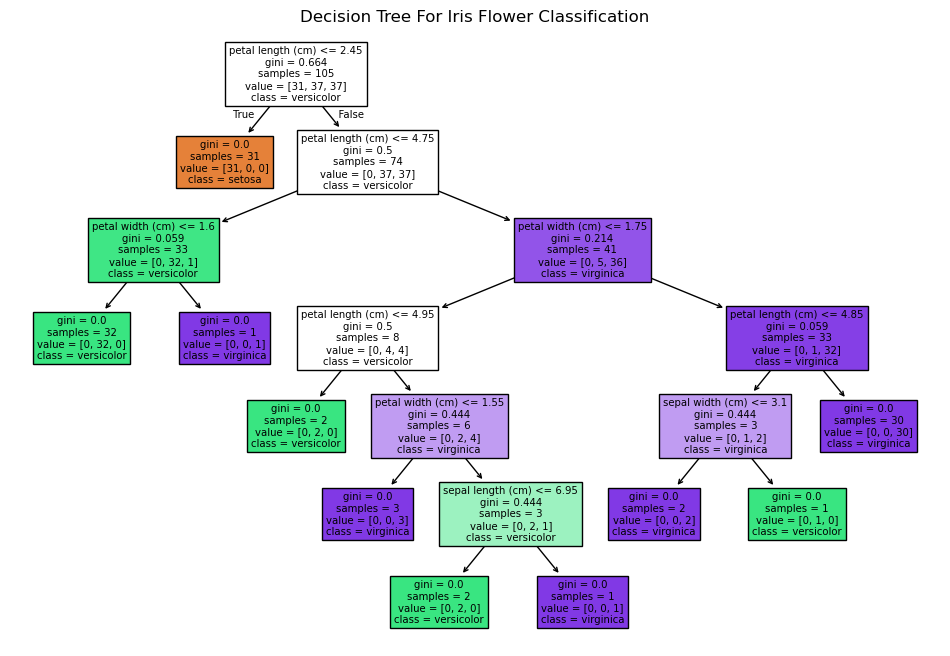

In [31]:
# Visualize the decisin tree
plt.figure(figsize=(12,8))
plot_tree(classifier, feature_names = iris.feature_names, class_names = iris.target_names, filled = True )
plt.title("Decision Tree For Iris Flower Classification")
plt.show()
         

## Results Summary

- Decision Tree Classification
- Test Accuracy: 100.0%
- Key observations: e.g., Setosa is perfectly separable; Versicolor/Virginica have some overlap.
